In [10]:
r"""
Inputs
------
- water_depth
- boundaries
- potentials_onshore

Outputs
-------

Description
-----------
Plot maps of potentials

Plot potential cost curves
"""
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import rioxarray as rxr

In [2]:
path_water_depth = "../data/potentials_offshore/gebco_2023_sub_ice_topo/GEBCO_2023_sub_ice_topo.nc"
path_boundaries_eez = "../build/shapes/eez.geojson"
path_boundaries_onshore = "../data/europe-98-zones.geojson/europe-98-zones.geojson"
path_areas_onshore = ""

In [3]:

boundaries_eez = gpd.read_file(path_boundaries_eez)
boundaries_onshore = gpd.read_file(path_boundaries_onshore)

In [12]:
water_depth = xr.open_dataset(path_water_depth)
water_depth = water_depth.coarsen(dim={"lat": 20, "lon": 20}, boundary="trim").mean()
water_depth = water_depth.rio.write_crs("epsg:4326")
water_depth = water_depth.rio.clip(boundaries_eez.geometry)

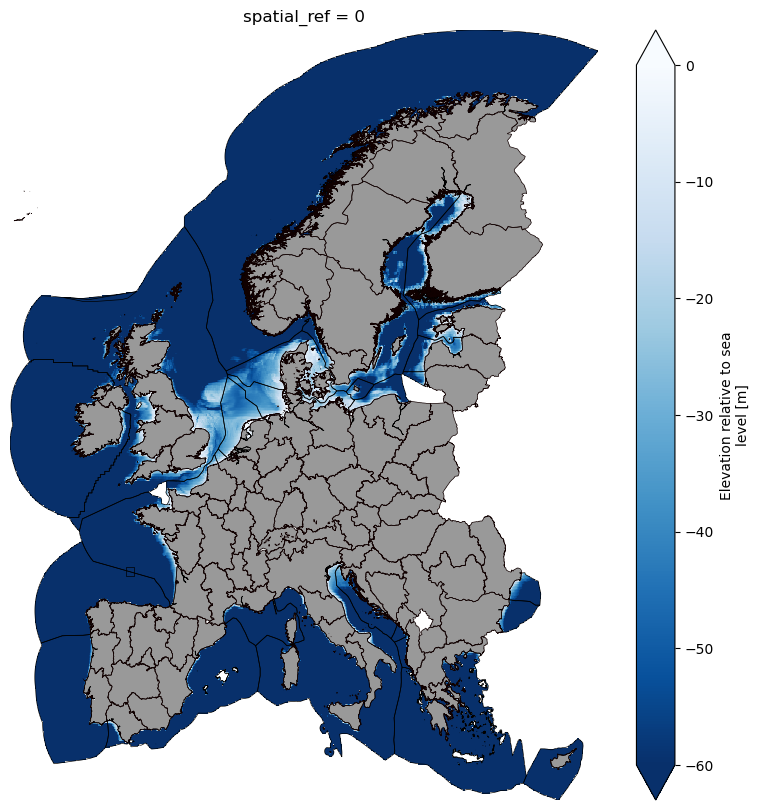

In [23]:
# TODO: Crete and Kosovo are missing and some region in front of the coast of Normandy

fig, ax = plt.subplots(figsize=(10, 10))
boundaries_eez.geometry.boundary.plot(ax=ax, linewidth=0.5, color='#000000')
boundaries_onshore.geometry.boundary.plot(ax=ax, linewidth=0.5, color='#100000')
boundaries_onshore.geometry.plot(ax=ax, color='#000000', alpha=0.4)
water_depth.elevation.plot(ax=ax, vmin=-60, vmax=0, cmap="Blues_r")
ax.set_axis_off()
# ax.legend()
plt.show()


In [ ]:
TODO: Plot potential areas onshore and offshore
